In [50]:
import pandas as pd
import numpy as np
import re
%pip install matplotlib
from matplotlib import pyplot as plt
import datetime as dt
from datetime import datetime
%pip install scipy
from scipy.stats import linregress

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [149]:
def tweet_to_rating(tweet):
    """
    Args:
        tweet: a string that optionally contains a rating of the form x/10, where x is a positive integer

    Returns: NAN if the tweet has no rating, otherwise returns the numerical value of the rating
    """
    match = re.search(r'(\d+(?:\.\d+)?)/10', tweet)
    rating = match and float(match.groups()[0]) 
    return match and rating and float(match.groups()[0]) 


dog_rates = pd.read_csv("dog_rates_tweets.csv", parse_dates=[1])
dog_rates

,id,created_at,text
0,994677639364403200,2018-05-10 20:36:44,@Steff88979267 tell them to h*ck off
1,994364904978239488,2018-05-09 23:54:02,@NFLOwnerGBP take it back
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...
3,994336722875047936,2018-05-09 22:02:03,@rachaellanaghan ❤️
4,994024065982717952,2018-05-09 01:19:40,This is Captain Jack Wobbles. He is currently ...
...,...,...,...
8510,1027980978910687233,2018-08-10 18:12:18,@GregWWoods thanks for donating $10.00 to @dog...
8511,1027976875811819520,2018-08-10 17:56:00,@DiannaC thanks for donating $10.00 to @dog_ra...
8512,1027970381766963202,2018-08-10 17:30:12,@runnjen @livelikeroo @Goodworld omg Justice y...
8513,1027967697684815873,2018-08-10 17:19:32,@shelbymorganart thanks for donating $10.00 to...


In [150]:
def dates_and_ratings_of_valid_tweets(tweets):
    """
    Args:
        tweets: a DataFrame where each row contains the date a tweet was sent, the user who made
        the tweet, and the content of the tweet

    Returns: a DataFrame where each row has a date and rating of a tweet 
    corresponding to that date which contains a rating of the form x/10, 
    where x is in [0, 25]
    """
    def remove_invalid_ratings(tweet_coll):
        return tweet_coll.dropna()

    tweets_with_ratings = dog_rates.assign(rating=dog_rates['text'].apply(tweet_to_rating))
    return remove_invalid_ratings(tweets_with_ratings)


In [153]:
tweets_with_valid_ratings = dates_and_ratings_of_tweets(dog_rates)
ratings = tweets_with_valid_ratings['rating']
dates = tweets_with_valid_ratings['created_at']
tweets_with_valid_ratings

,id,created_at,text,rating
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0
...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0


In [120]:
def slope_and_intercept_of_best_fit_line(x_cors, y_cors):
    regress_info = linregress(x_cors, y_cors)
    return regress_info.slope, regress_info.intercept

to_seconds = lambda x: x.timestamp()
slope,intercept = slope_and_intercept_of_best_fit_line(dates.apply(to_seconds), ratings)

In [121]:
def add_date_in_seconds_and_rating_prediction(df: pd.DataFrame, slope, intercept) -> pd.DataFrame:
    copy = df.copy()
    copy['timestamp'] = copy['created_at'].apply(to_seconds)
    copy['prediction'] = copy['timestamp'] * slope + intercept
    return copy

In [122]:
tweets_with_dates_in_seconds = add_date_in_seconds_and_rating_prediction(tweets_with_valid_ratings, slope, intercept)
tweets_with_dates_in_seconds

,id,created_at,text,rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,13.185763
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,13.181785
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,13.179609
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,13.167614
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,13.163804
...,...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535056e+09,13.507338
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534957e+09,13.503856
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534811e+09,13.498710
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534351e+09,13.482540


In [123]:
slope, intercept

(3.515929974847722e-08, -40.46415480898917)

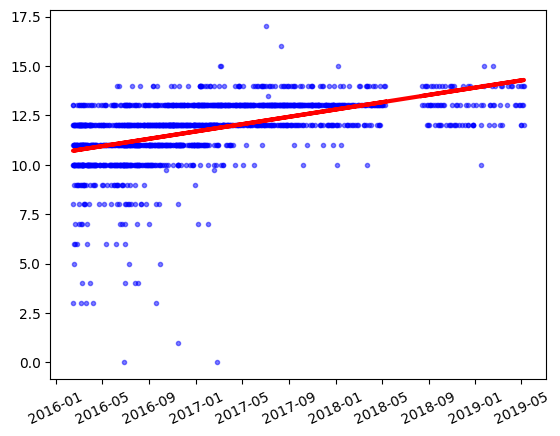

In [124]:
plt.xticks(rotation=25)
plt.plot(dates, ratings, 'b.', alpha=0.5)
plt.plot(dates, dates_in_seconds * slope + intercept, 'r-', linewidth=3)